## Some Visualization of the data

In [1]:
import pandas as pd
import numpy as np

from AQIdata.data import Data

# plotting library
from plotnine import *

In [2]:
d = Data()

In [3]:
df = d.read_clean_data()

In [4]:
def filter_sf(df): 
    
    return df.copy().loc[df['CBSA Code'] == 41860].reset_index(drop=True)

In [5]:
df_sf = filter_sf(df)

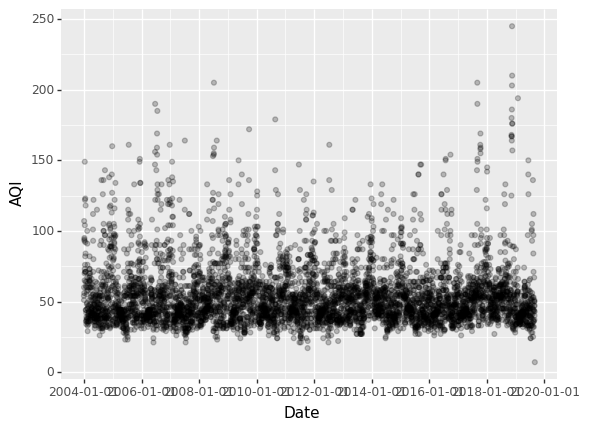

<ggplot: (309257862)>

In [6]:
ggplot(df_sf, aes('Date', 'AQI')) + geom_point(alpha=.23) 

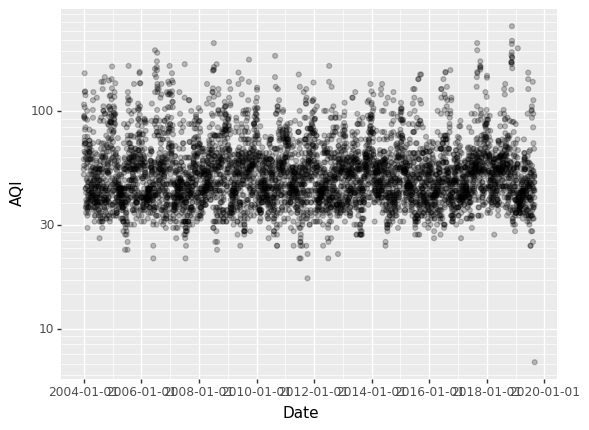

<ggplot: (-9223372036547388328)>

In [7]:
(ggplot(df_sf, aes('Date', 'AQI')) 
 + geom_point(alpha=.23) 
 + scale_y_log10())

In [17]:
df_stat = df_sf.set_index('Date')['AQI'].rolling(365).mean().reset_index()

/Users/william/.local/share/virtualenvs/AQIdata-nkzgc4XL/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 364 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)


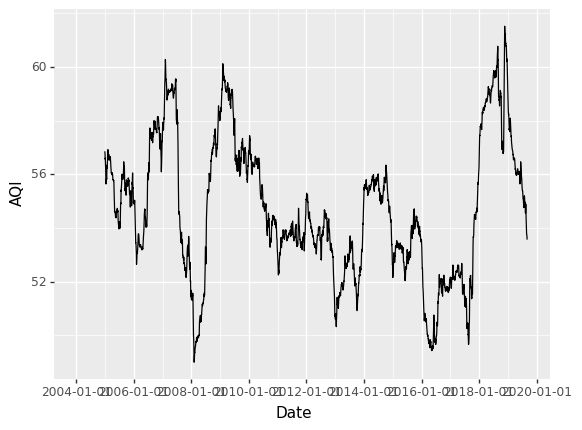

<ggplot: (-9223372036546779132)>

In [21]:
ggplot(df_stat, aes('Date', 'AQI')) + geom_line() 

In [21]:
df_stat = df_sf.groupby(['Month', 'Year']).agg(mean=('AQI', 'mean')).reset_index()

In [29]:
g = (ggplot(df_stat, aes('Month', 'mean', group='Year', color='factor(Year)')) 
     + geom_line()
     + scale_x_continuous(breaks=np.arange(1, 13)))

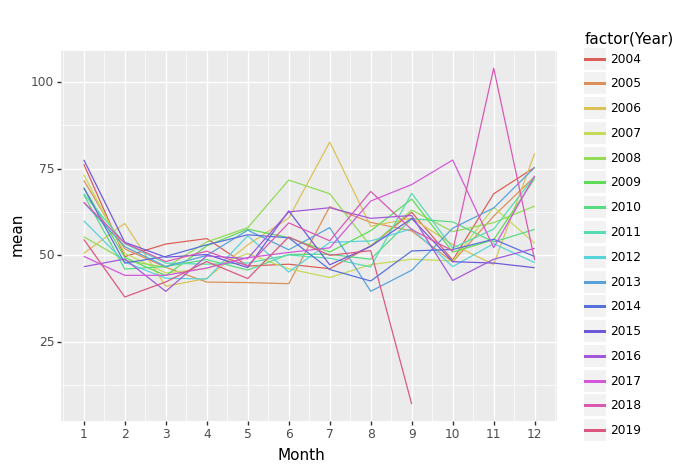

<ggplot: (322660174)>

In [30]:
g